In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#can be reused for other scripts
def load_dataset(input_file,folder = "dataset/"):
    return pd.read_csv(folder+input_file,encoding='utf-8')


train = load_dataset('train.csv')


In [3]:
#Try to do a simple model only with train dataset
#lets decompose all the features
train.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1


In [4]:
train.source_screen_name.unique()

array(['Explore', 'Local playlist more', nan, 'My library',
       'Online playlist more', 'Album more', 'Discover Feature', 'Unknown',
       'Discover Chart', 'Radio', 'Artist more', 'Search',
       'Others profile more', 'Search Trends', 'Discover Genre',
       'My library_Search', 'Search Home', 'Discover New',
       'Self profile more', 'Concert', 'Payment'], dtype=object)

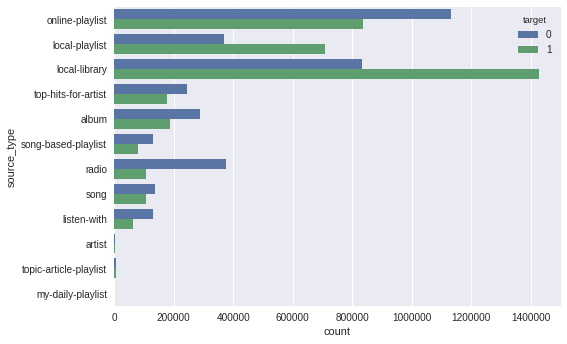

In [5]:
sns.countplot(y='source_type',hue='target',data=train)

In [6]:
train[train['source_type'] == 'local-playlist'].target.value_counts()

1    710010
0    369493
Name: target, dtype: int64

In [7]:
#get the proba for each source_type
ml = {}
for value in train.source_type.unique():
    counts = train[train['source_type'] == value].target.value_counts()
    if len(counts) > 0:
        print(counts)
        ml[value] = counts[1] / (counts[0]+counts[1])
    else:
        ml[value] = 0.0

0    1131585
1     836339
Name: target, dtype: int64
1    710010
0    369493
Name: target, dtype: int64
1    1429426
0     831973
Name: target, dtype: int64
0    246316
1    177298
Name: target, dtype: int64
0    289547
1    187797
Name: target, dtype: int64
0    130430
1     80097
Name: target, dtype: int64
0    376953
1    106156
Name: target, dtype: int64
0    137666
1    107056
Name: target, dtype: int64
0    131200
1     61642
Name: target, dtype: int64
1    1740
0    1298
Name: target, dtype: int64
0    5661
1    5533
Name: target, dtype: int64
0    414
1    249
Name: target, dtype: int64


In [8]:
ml


{'online-playlist': 0.42498541610346741,
 'local-playlist': 0.65771933936265115,
 'local-library': 0.63209809502878533,
 'top-hits-for-artist': 0.41853668670062838,
 'album': 0.39342067775021788,
 nan: 0.0,
 'song-based-playlist': 0.38045951350658108,
 'radio': 0.21973509083871343,
 'song': 0.43745964809048637,
 'listen-with': 0.31965028365190157,
 'artist': 0.57274522712310727,
 'topic-article-playlist': 0.49428265142040378,
 'my-daily-playlist': 0.3755656108597285}

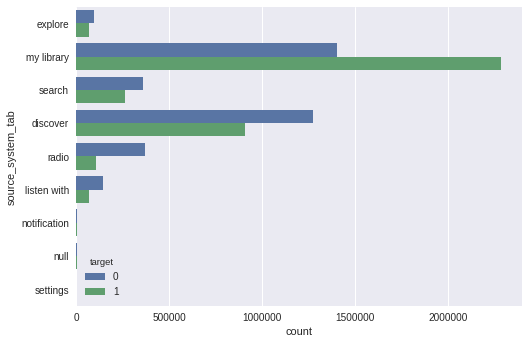

In [20]:
sns.countplot(y='source_system_tab',hue='target',data=train)

In [9]:
#make the most simple classifier base on the source_type
test = load_dataset('test.csv')

In [10]:
test = test[['id','source_type']]

In [11]:
sub = test.source_type.apply(lambda x: ml[x])

In [12]:
sub = pd.DataFrame(sub)

In [13]:
sub['id'] = sub.index
sub['target'] = sub['source_type']
del sub['source_type']


In [15]:
sub.to_csv('out/dumbSub.csv',index=False)

In [ ]:
#60% acc :/